In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bicho15h","key":"97e3a4c4c190ec2c4cd7972b5c9a4ffa"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sankalpsrivastava26/capital-alphabets-28x28

100% 3.17G/3.17G [03:02<00:00, 20.8MB/s]
100% 3.17G/3.17G [03:02<00:00, 18.6MB/s]


In [ ]:
! mkdir aplhabet

In [ ]:
! unzip capital-alphabets-28x28.zip -d alphabet

Streaming output truncated to the last 5000 lines.
  inflating: alphabet/datasetSmall/validation/t/002691.png  
  inflating: alphabet/datasetSmall/validation/t/002692.png  
  inflating: alphabet/datasetSmall/validation/t/002693.png  
  inflating: alphabet/datasetSmall/validation/t/002694.png  
  inflating: alphabet/datasetSmall/validation/t/002695.png  
  inflating: alphabet/datasetSmall/validation/t/002696.png  
  inflating: alphabet/datasetSmall/validation/t/002697.png  
  inflating: alphabet/datasetSmall/validation/t/002698.png  
  inflating: alphabet/datasetSmall/validation/t/002699.png  
  inflating: alphabet/datasetSmall/validation/t/002700.png  
  inflating: alphabet/datasetSmall/validation/t/002701.png  
  inflating: alphabet/datasetSmall/validation/t/002702.png  
  inflating: alphabet/datasetSmall/validation/t/002703.png  
  inflating: alphabet/datasetSmall/validation/t/002704.png  
  inflating: alphabet/datasetSmall/validation/t/002705.png  
  inflating: alphabet/datasetSmall

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans
import os
import cv2
from skimage import color

In [ ]:
def load_data(data_dir):
    IMG_WIDTH,IMG_HEIGHT = 128,128
    images = []
    labels = []
    dirs = os.listdir(data_dir)

    for dir in dirs:
        path = os.path.join(data_dir,str(dir))
        i=0
        for image_name in os.listdir(path):
            image_path = os.path.join(path,image_name)
            image = cv2.imread(image_path,  cv2.IMREAD_UNCHANGED)
            if image is not None:
              i+=1
              image = cv2.resize(image,(IMG_WIDTH,IMG_HEIGHT),interpolation = cv2.INTER_AREA)
              images.append(image)
              labels.append(dir)
              if i==100:
                i=0
                break


    return (images,labels)
images, labels = load_data("/content/alphabet/dataset/test")

In [ ]:
images = np.array(images)
labels = np.array(labels)
print(np.unique(labels))

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


In [ ]:
images = np.array(images)
labelss = np.array(labels)
labels_num = []
dit = {}

j=0
for i in labels:
  if i in dit:
    labels_num.append(dit[i])
  else:
    dit[i]=j
    j=j+1
    labels_num.append(dit[i])

In [ ]:
numberOfImages,width,heigth = images.shape
print(width)
print(heigth)
images_1d = images.reshape(numberOfImages,width*heigth)

128
128


In [ ]:
images_1d.shape

(2600, 16384)

<ipython-input-27-a00f2f5c2658>:33: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,6 , centroid + 1)


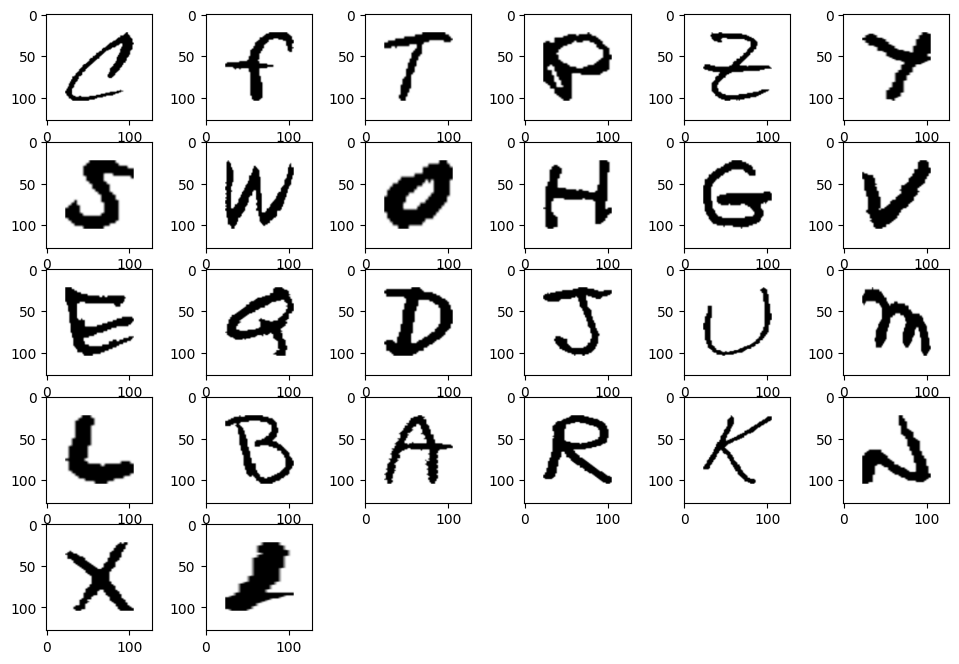

In [ ]:
initial_centroids = np.array([

 images_1d[10],#1
 images_1d[105],#2
 images_1d[205],#3
 images_1d[305],#4
 images_1d[405],#5
 images_1d[505],#6
 images_1d[605],#7
 images_1d[705],#8
 images_1d[805],#9
 images_1d[905],#10
 images_1d[1005],#11
 images_1d[1105],#12
 images_1d[1205],#13
 images_1d[1305],#14
 images_1d[1405],#15
 images_1d[1505],#16
 images_1d[1605],#17
 images_1d[1705],#18
 images_1d[1815],#19
 images_1d[1903],#20
 images_1d[2005],#21
 images_1d[2105],#22
 images_1d[2205],#23
 images_1d[2305],#24
 images_1d[2405],#25
 images_1d[2550]#26
])
fig, ax = plt.subplots(figsize=(12, 8))

for centroid in range(len(initial_centroids)):
    plt.subplot(5,6 , centroid + 1)

    plt.imshow(initial_centroids[centroid].reshape(128, 128), cmap='Greys')

In [ ]:
kmeans = KMeans(n_clusters=26,init= initial_centroids,n_init=1 )

In [ ]:
kmeans.fit(images_1d)

KMeans(init=array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
       n_clusters=26, n_init=1)

In [ ]:
kmeans_centroids = kmeans.cluster_centers_

kmeans_centroids

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
kmeans_centroids.shape

(26, 16384)

<ipython-input-32-34d851b7f6af>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,6 , centroid + 1)


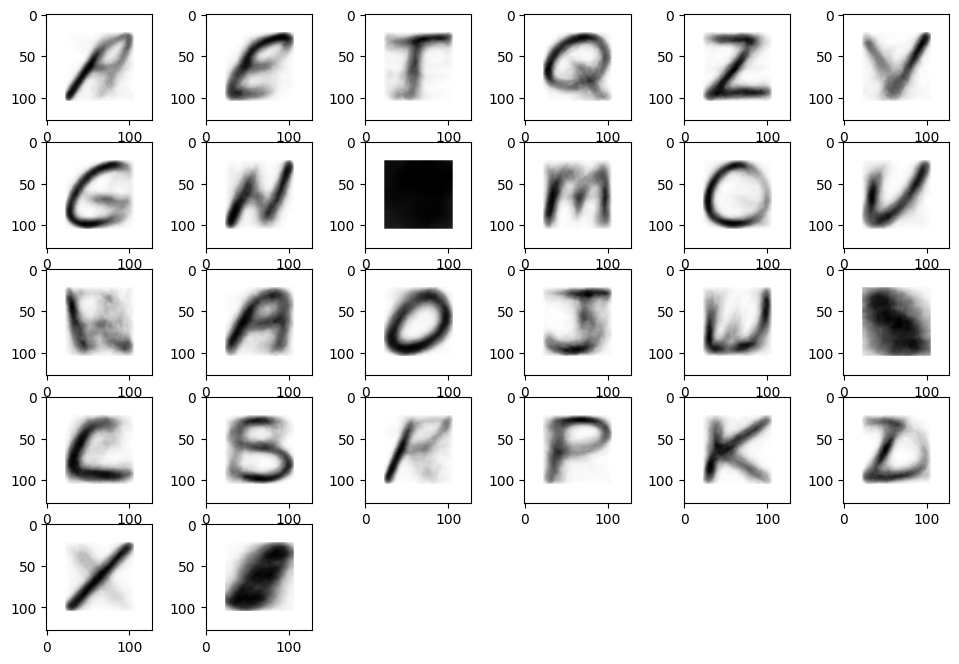

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

for centroid in range(len(kmeans_centroids)):
    plt.subplot(5,6 , centroid + 1)

    plt.imshow(kmeans_centroids[centroid].reshape(128, 128), cmap='Greys')

In [ ]:
np.unique(kmeans.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int32)

In [ ]:
kmeans.labels_.shape

(13000,)

In [ ]:
def predict(image):

  return kmeans.predict(grayscale_pixels)

In [ ]:
path = "/content/intel/seg_test/seg_test/"

a= kmeans.predict(images_1d)

with open("file", 'w') as f:
    # Perform your operations here
    for i in a:
      f.write(str(i))
      f.write(" ")

In [ ]:

print("Homogeneity_score: ", metrics.homogeneity_score(labels_num, kmeans.labels_))
print("Completeness_score: ", metrics.completeness_score(labels_num, kmeans.labels_))
print("v_measure_score: ", metrics.v_measure_score(labels_num, kmeans.labels_))
print("Adjusted_rand_score: ", metrics.adjusted_rand_score(labels_num, kmeans.labels_))
print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(labels_num,  kmeans.labels_))
print("Silhouette_score: ", metrics.silhouette_score(images_1d, kmeans.labels_))

Homogeneity_score:  0.45622077152280277
Completeness_score:  0.4610155161364977
v_measure_score:  0.45860561184840404
Adjusted_rand_score:  0.22832642989429847
Adjusted_mutual_info_score:  0.43605736223956226
Silhouette_score:  0.0734526777030556
